# ASTR 596: The Final

#### Three questions, each worth a third of your grade. (I'll make one 34 pts to get to an even 100). Each is designed to test an area where I think the class as a whole is less comfortable. They are sorted by my assesment of difficulty from easiest to hardest. 
#### i.e. the last is probably going to be non-trivial, because well I like Gaussian distributions of grades. 
#### That's OK because the points and grades don't matter!

#### Remember, you can work together, discuss problems and solutions, but you have to write up your own solution. I'd strongly suggest doing that, ideally with some divide and conquer strategy.

### Q1. Using unsupervised learning to work with galaxies

The following query will select 20k likely galaxies from the SDSS database and return the results of that query into an `astropy Table`.  (For now, if you are not familiar with the SDSS DB schema, don't worry about this query, just know that it returns a bunch of photometric features.)

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS  # enables direct queries to the SDSS database

GALquery = """SELECT TOP 20000 
         p.dered_u - p.dered_g as ug, p.dered_g - p.dered_r as gr, 
         p.dered_g - p.dered_i as gi, p.dered_g - p.dered_z as gz,             
         p.petroRad_i, p.petroR50_i, p.deVAB_i, p.fracDev_i
         FROM PhotoObjAll AS p JOIN specObjAll s ON s.bestobjid = p.objid
         WHERE p.mode = 1 AND s.sciencePrimary = 1 AND p.clean = 1 AND p.type = 3
         AND p.deVAB_i > -999 AND p.petroRad_i > -999 AND p.petroR50_i > -999 AND p.dered_r < 20
           """
SDSSgals = SDSS.query_sql(GALquery)
SDSSgals

<Table length=20000>
    ug        gr        gi        gz    petroRad_i petroR50_i  deVAB_i  fracDev_i
 float64   float64   float64   float64   float64    float64    float64   float64 
--------- --------- --------- --------- ---------- ---------- --------- ---------
 1.999718 0.9592915  1.370582  1.692535   5.454633   2.344662 0.8708095       1.0
  1.98884 0.9332962  1.361919  1.668918   5.177937   2.424093 0.9946066 0.8865207
 1.020407  1.601521  2.396175  2.827263   5.846272   1.158836 0.6898293       1.0
  1.83742  1.211882  1.688545  1.989878   7.145427   2.795447 0.7493948       1.0
  4.55904  1.536175   2.29286  2.712597   4.741546    2.09032 0.5173162 0.8244159
 4.532835  1.433081  2.251518  2.669952   8.930706   1.656738 0.6116931       1.0
 2.075247  1.267462  1.746914  2.053957   5.091534   2.249913 0.6196061       1.0
 1.677757  1.102043  1.582317  1.902397     6.5472   2.809995 0.8713289 0.9118057
 1.858603 0.9054127  1.364218  1.661177   6.641626    2.84336    0.4171       1.0
   2.1474  1.623241  2.260538  2.703392   2.730807   1.252324 0.3585599 0.6629297
 2.596178  1.578781  2.520107  3.093014    2.63223   1.165497 0.4484372       0.0
 1.857225  0.874958  1.310269   1.56598   5.100227   2.224089 0.7232268 0.5375076
      ...       ...       ...       ...        ...        ...       ...       ...
 1.877674 0.9172325  1.349802  1.704502   4.428074   2.022316 0.6654718  0.792691
 1.723682  1.273968   1.79376  2.159302   4.326114   1.944957 0.5245109 0.6023223
 1.100187  1.551811  2.186342  2.517469   3.312458   1.376517  0.649698       1.0
 1.552921 0.6123333  0.950491  1.225523   4.607104   2.120929 0.5645534 0.4308302
  1.78319 0.9274311  1.322368  1.633915   9.585835   5.004014 0.8721532 0.9653795
 2.382399  1.002464  1.485828  1.869482    5.37081   1.996141 0.2472901 0.8234099
 2.884468   1.37335  1.986078  2.420418   4.263147   1.734177 0.8070391  0.866703
 2.328571  1.843489  2.472891  2.808945   4.961413   2.141469  0.634818       1.0
 2.070669 0.8767052  1.292429  1.576104   5.124873   2.177194 0.4639169 0.9869598
 1.525362  1.759069  2.357334  2.781452   4.056126   1.721061  0.844359       1.0
 2.149218  1.162842  1.579409  1.962507   1.428952  0.7179958 0.9539293       0.0
0.9063187 0.2823792 0.5598049 0.5574856   2.994002   1.483509 0.5181968 0.1668977

### 1a - Visualize the dataset in g-i (y) vs u-g (x) and all the features (11 pts). 

The bluest galaxies are star-forming galaxies at low redshift 𝑧. The "tight" cluster of red galaxies are passive galaxies at low-𝑧. Finally the diffuse cloud at 𝑔−𝑖≈3 are high-𝑧 luminous red galaxies (LRGs) that were targeted for BAO measurements. These sources have a wide range of 𝑢−𝑔 colors because they essentially are not detected in the 𝑢 band as this is blueward of the Lyman break.

Plot and examine each of the features in this data set using seaborn's `PairGrid`. Overlay a histogram and kernel density distribution (KDE) on each 1D and 2D plot. You should be able to roughly see the different groups of galaxies, but how to separate them?

In [96]:
import seaborn as sns
from seaborn import PairGrid

In [97]:
gi=SDSSgals['gi']
ug=SDSSgals['ug']
ind=(ug>-2000)&(gi>-2000)

In [98]:
ugi=pd.DataFrame((ug[ind],gi[ind])).T

In [99]:
ugi.columns=['ug','gi']

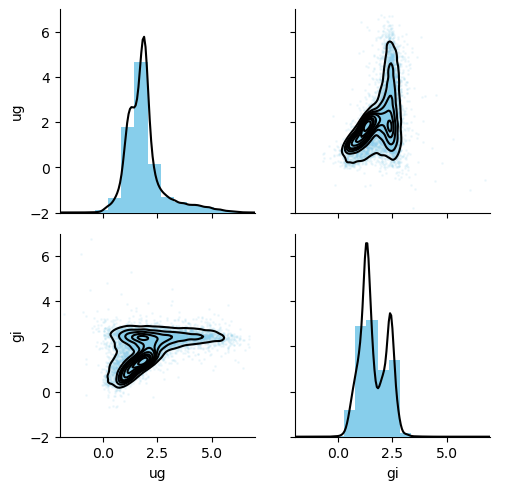

In [76]:
grim=PairGrid(ugi)
grim=grim.map_diag(plt.hist,bins=20,density=True,color='skyblue')
grim=grim.map_diag(sns.kdeplot,color='k')
grim=grim.map_offdiag(plt.scatter,color='skyblue',s=1,alpha=0.1)
grim=grim.map_offdiag(sns.kdeplot,color='k')
grim=grim.add_legend()
grim.set(xlim=(-2,7),ylim=(-2,7))
plt.show()

### 1b - Separating the galaxy types (11 pts) 

Using K-means from `sklearn` with n=3, separate the three clusters of galaxies. Initial guesses, hyper-paramter tuning, dimensionality reduction etc are your choices. What's important is to be able to justify them. To the referee, to me, to yourself. We'll do that in the next part. 

In [153]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [141]:
gr=SDSSgals['gr']
gz=SDSSgals['gz']
ind=(ug>-2000)&(gi>-2000)&(gr>-2000)&(gz>-2000)
ugriz=pd.DataFrame((ug[ind],gr[ind],gi[ind],gz[ind])).T
ugriz.columns=['ug','gr','gi','gz']

In [190]:
kmeans=KMeans(n_clusters=3)

In [191]:
kmeans.fit(ugriz)

/Users/seonwoo/anaconda3/envs/sw/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

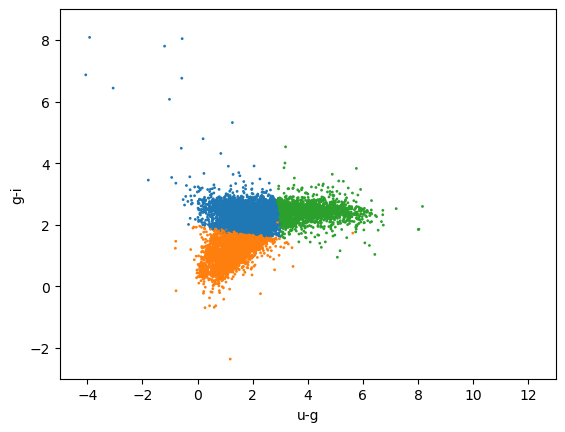

In [192]:
labels = kmeans.labels_
color = [f'C{i}' for i in labels]
plt.scatter(ugriz['ug'].values, ugriz['gi'].values, color=color,s=1)
plt.xlabel('u-g');plt.ylabel('g-i')
plt.xlim(-5,13);plt.ylim(-3,9)
plt.show()

z = StandardScaler()
Xt = z.fit_transform(ugriz)

  PCA dimension reduction
pca = PCA(n_components=1).fit(ugriz)

kmeans = KMeans(init=pca.components_, n_clusters=3)

z = StandardScaler()
Xt = z.fit_transform(ugi)

kmeans.fit(Xt)

### 1c - Working with the distributions (11 pts)
Repeat 1a, but using the results of K-means in 1b to create separately colored distributions for your different classes of galaxies. Use the KDE to provide the mean values of each feature and their standard deviation (hint - these are integrals), and compare them to the sample means and standard deviations. 

In [266]:
c0=ugriz[labels==0]
c1=ugriz[labels==1]
c2=ugriz[labels==2]

In [275]:
lb_str=[]
for lb in labels:
    lb_str.append(str(lb))

In [318]:
ugriz_all=pd.DataFrame(data=np.vstack((ug[ind],gi[ind],labels))).T
#ugriz_all=pd.DataFrame(data=np.vstack((ug[ind],gr[ind],gi[ind],gz[ind],labels))).T

In [319]:
ugriz_all

0         1    2
0      1.999718  1.370582  1.0
1      1.988840  1.361919  1.0
2      1.020407  2.396175  0.0
3      1.837420  1.688545  1.0
4      4.559040  2.292860  2.0
...         ...       ...  ...
19989  2.328571  2.472891  0.0
19990  2.070669  1.292429  1.0
19991  1.525362  2.357334  0.0
19992  2.149218  1.579409  1.0
19993  0.906319  0.559805  1.0

[19994 rows x 3 columns]

In [321]:
ugriz_all.columns=['ug','gi','labels']
#ugriz_all.columns=[*ugriz.columns,'labels']

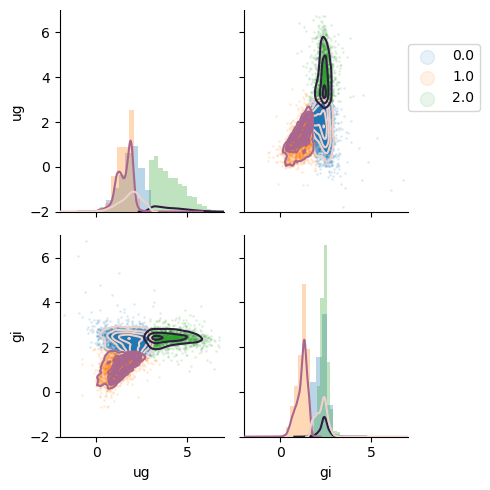

In [347]:
grim=PairGrid(ugriz_all,hue='labels')
grim=grim.map_diag(plt.hist,bins=20,density=True,alpha=0.3)
grim=grim.map_diag(sns.kdeplot)
grim=grim.map_offdiag(plt.scatter,s=1,alpha=0.1)
grim=grim.map_offdiag(sns.kdeplot,color='w')

#grim=grim.add_legend(markerscale=10)
plt.legend(markerscale=10,loc=[1,0.5])
grim.set(xlim=(-2,7),ylim=(-2,7))
plt.tight_layout()
plt.show()

### Q2. Gaussian Processes + Emcee

There are many sources with periodic light curves that are not strictly sinusoidal. Thus, the use of the cosine kernel (on its own) may not be sufficient to model the signal. The quasi-periodic kernel: 

$$K_{ij} = k(x_i - x_j) = A \exp \left(-\Gamma \sin^2\left[\frac{\pi}{P} \left|x_i - x_j\right|\right]\right)$$

is useful for non-sinusoidal signals. It is implemented in the `george` package. Note that the parameters in the kernel aren't the only parameters you might need... look back on your previous homework assignments and think about what I'm glossing over here. 

I've given you an example light curve file with a decidedly non-sinusoidal, periodic signal from the ASAS-SN project from our colleagues at OSU. 

### 2a - Implement the model  (11 pts)

Examine this data, filter it as you see fit (I've included the file header in full - I'd pick one aperture, and look at the grades and notes about separate datasets). You can make tradeoffs here - more data that is potentially messier, vs less data so weaker constraints, but cleaner. Pick something that you can justify (and if you're struggling at 2c, examine this choice before twiddling with emcee). 

Write down a model for it with the likelihood function, an appropriate prior and posterior.

You may wish to look at the `george` documentation again, particularly how some parameters are better log transformed if the expectation is that they are positive real values. 

https://george.readthedocs.io/en/latest/tutorials/model/

In [382]:
asndata = pd.read_table('asas_data.dat', header=None, comment='#', delimiter='\s+')

In [384]:
asndata1 = asndata.iloc[:227, [0,2,1,3,4,5,7,6,8,9,10,11,12]]

In [389]:
atot = asndata.copy()
atot.iloc[:227] = asndata1
atot.columns = ['HJD','MAG_0','MAG_1','MAG_2','MAG_3','MAG_4','MER_0','MER_1','MER_2','MER_3','MER_4','GRADE','FRAME']

In [396]:
atota=atot[atot['GRADE']=='A']

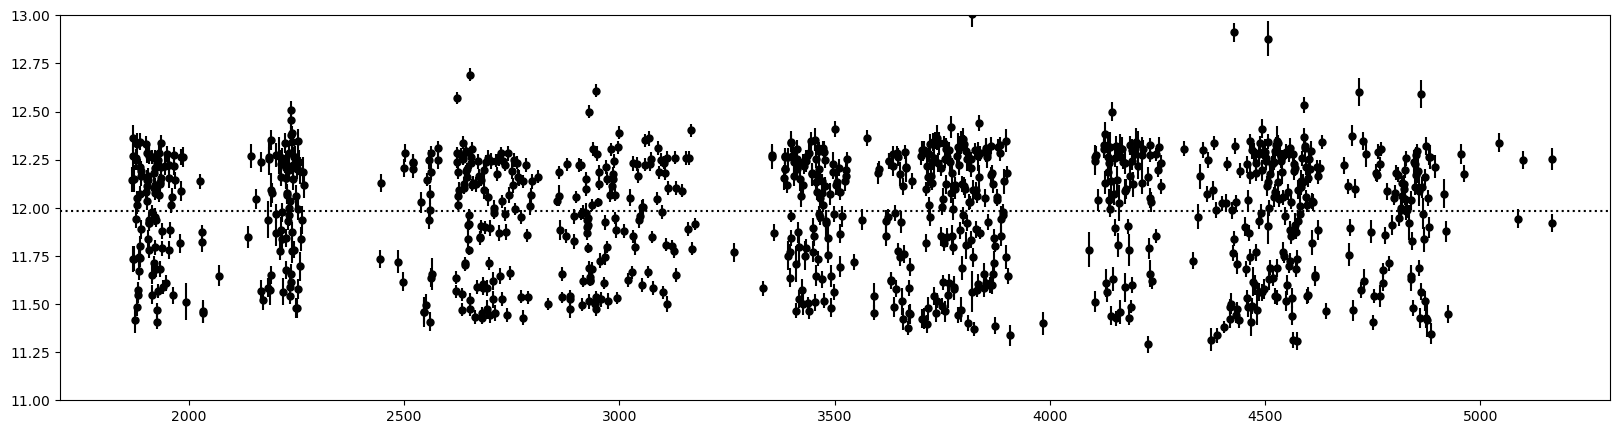

In [817]:
plt.figure(figsize=(20, 5))
plt.errorbar(atota['HJD'],atota['MAG_0'],yerr=atota['MER_0'],fmt='o',markersize=5,color='k')
plt.axhline(np.mean(atota['MAG_0']), c='k', ls=':')
plt.xlim(1700, 5300)
plt.ylim(11, 13)
plt.show()

In [500]:
import george
from george.modeling import ConstantModel as cmodel
from george import kernels
import scipy.stats as st

In [818]:
def kernel(a,gamma,period,lamb):
    return a*kernels.ExpSine2Kernel(gamma=gamma,log_period=period)*kernels.ExpSquaredKernel(metric=lamb)

$$\mu(x)=m_{const.}$$

$$K_{ij} = k(x_i - x_j) = A \exp \left(-\Gamma \sin^2\left[\frac{\pi}{P} \left|x_i - x_j\right|\right] -  \frac{|x_i-x_j|^2}{2\lambda}\right)$$

### 2b - Initial Guesses (11 pts)

Make some initial guess for the parameters. For the period, use Lomb-Scargle to find the top three periods for this light curve. Initialize 1/3rd of the walkers to each of the top three periods

Do the burn in with `emcee` - a 100 walkers and a 1000 steps should be plenty - you should find that the walkers have migrated away from the starting guess. Plot the chains. 

Make a plot of the log of the Posterior vs the log of the Period - select the periods with the highest log Posterior and change the initial guess for the Period of all the walkers to be in a small region around the Period with the highest log Posterior. 

In [821]:
# mean function
m_i = np.mean(atota['MAG_0'])

# kernel parameters
a_i = np.std(atota['MAG_0'])
gamma_i = 100
lamb_i = 500

In [822]:
from astropy.timeseries import LombScargle
freq, pwr = LombScargle(atota['HJD'], atota['MAG_0']).autopower()

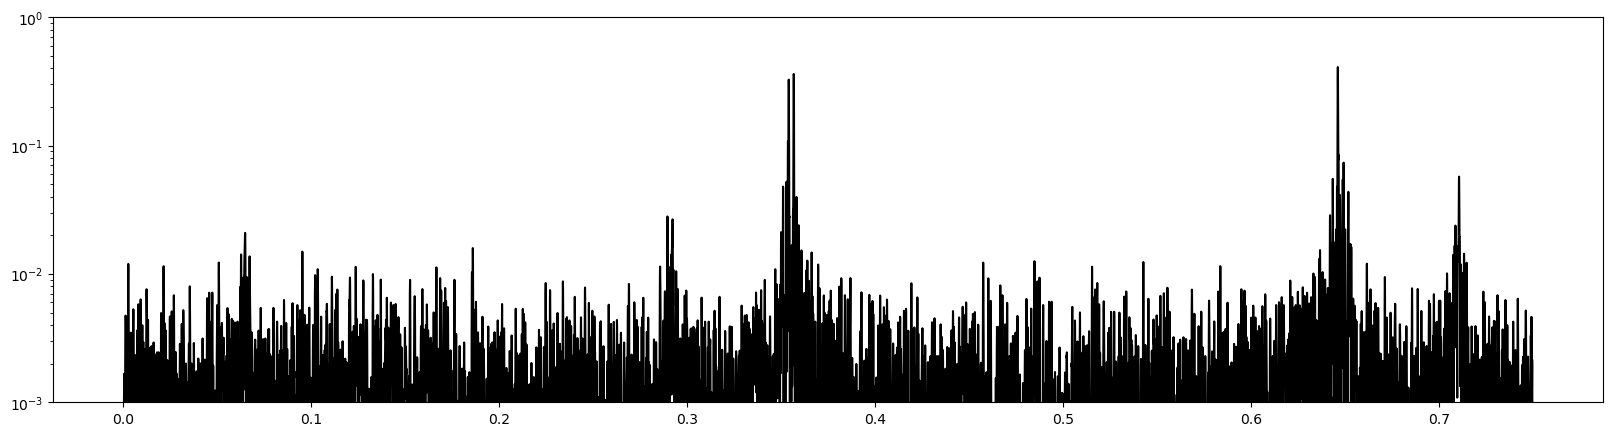

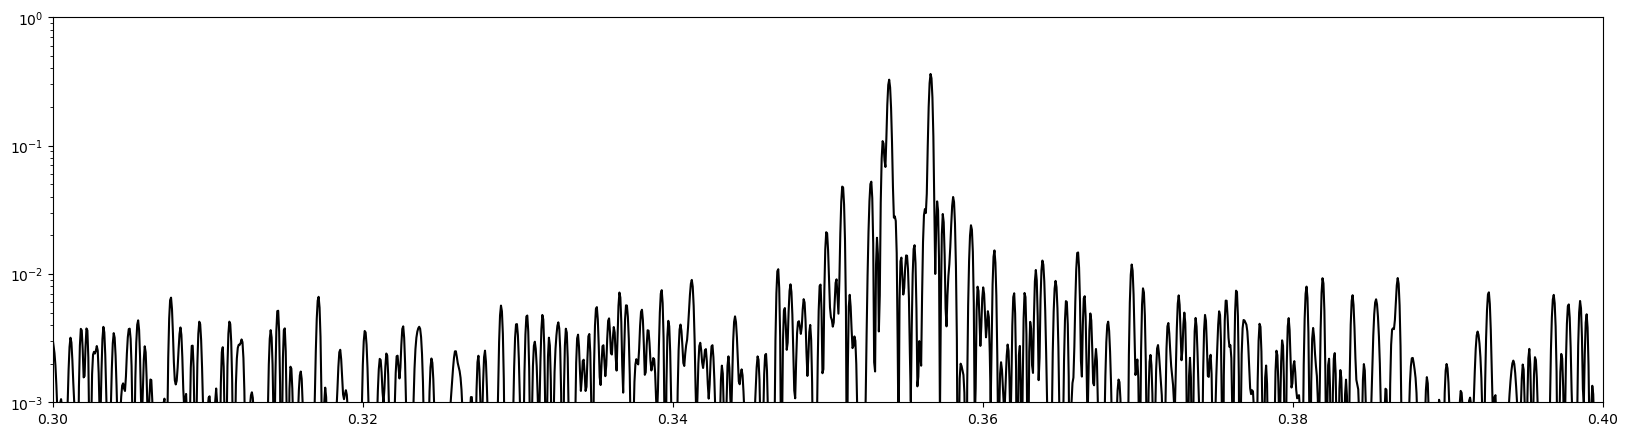

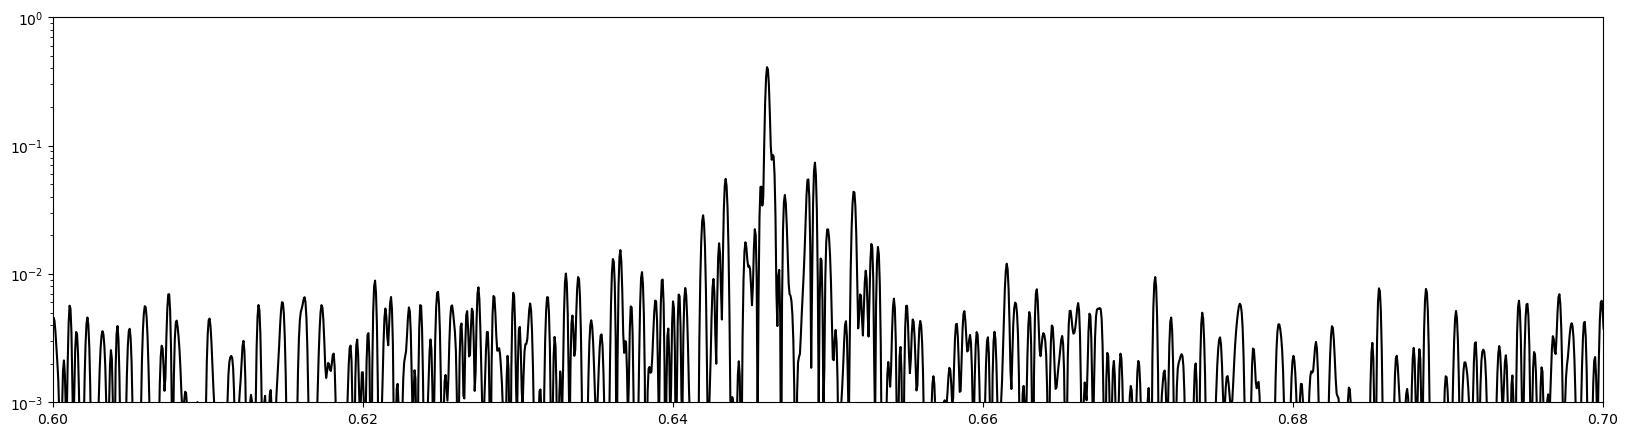

In [823]:
plt.figure(figsize=(20, 5))
plt.plot(freq, pwr, c='k')
plt.yscale('log')
plt.ylim(1e-3, 1)
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(freq, pwr, c='k')
plt.yscale('log')
plt.xlim(0.3, 0.4)
plt.ylim(1e-3, 1)
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(freq, pwr, c='k')
plt.yscale('log')
plt.xlim(0.6, 0.7)
plt.ylim(1e-3, 1)
plt.show()

In [824]:
p0 = np.log(freq[np.argmax(pwr)])
p1 = np.log(freq[np.argmax(pwr[freq<0.4])])
p2 = np.log(freq[freq>0.7][np.argmax(pwr[freq>0.7])])
p_is = [p0, p1, p2]
np.exp(p_is)

array([0.64606215, 0.35661224, 0.71058649])

In [825]:
pri = [m_i, a_i, gamma_i, p2, lamb_i]
gp = george.GP(kernel=kernel(*pri[1:]), mean=cmodel(pri[0]))
gp.compute(atota['HJD'],yerr=atota['MER_0'])

In [826]:
gp.get_parameter_dict()

OrderedDict([('mean:value', 11.982776541961577),
             ('kernel:k1:k1:log_constant', -1.2086278999242166),
             ('kernel:k1:k2:gamma', 100.0),
             ('kernel:k1:k2:log_period', -0.34166460326405834),
             ('kernel:k2:metric:log_M_0_0', 6.214608098422191)])

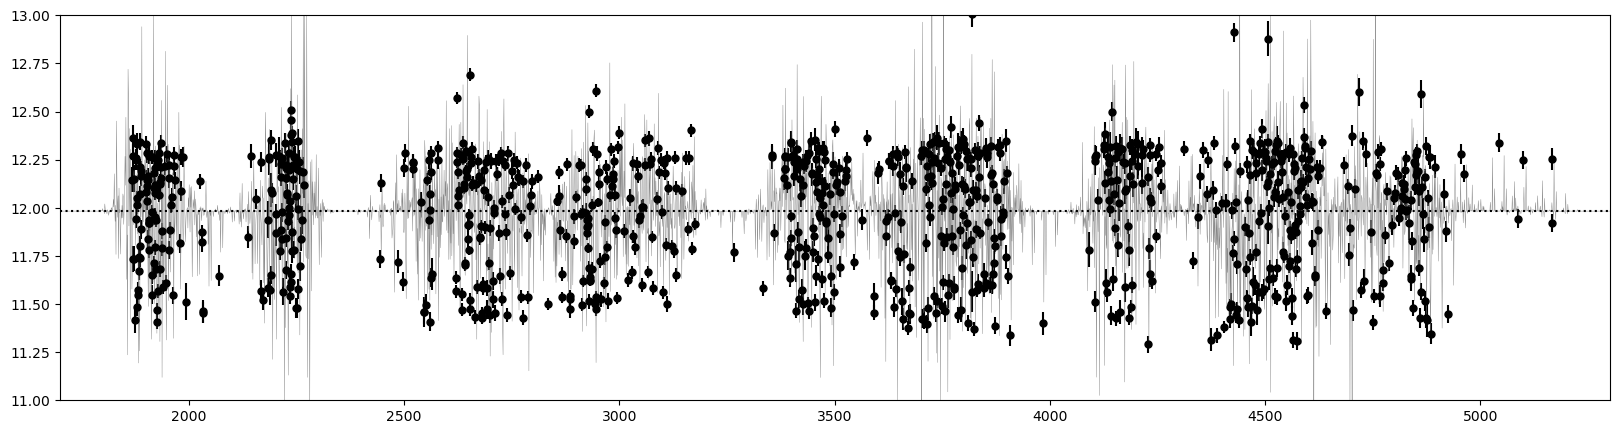

In [827]:
xx = np.linspace(1500, 5500, 4001)
pred = gp.predict(atota['MAG_0'], xx, return_cov=False)

plt.figure(figsize=(20, 5))
plt.errorbar(atota['HJD'],atota['MAG_0'],yerr=atota['MER_0'],fmt='o',markersize=5,color='k')
plt.plot(xx,pred,c='gray',lw=0.3)
plt.axhline(m_i, c='k', ls=':')
plt.xlim(1700, 5300)
plt.ylim(11, 13)
plt.show()

In [828]:
# generate chain with initial guess
pr0 = [m_i, np.log(a_i), gamma_i, p0, np.log(lamb_i)]
pr1 = [m_i, np.log(a_i), gamma_i, p1, np.log(lamb_i)]
pr2 = guess = [m_i, np.log(a_i), gamma_i, p2, np.log(lamb_i)]

bounds = []
bounds.append((m_i-2*a_i,m_i+2*a_i)) # mean
bounds.append((np.log(1e-3*a_i),np.log(1e+3*a_i))) # a
bounds.append((0.5, 200)) # gamma
bounds.append((np.log(1e-2),np.log(1))) # period
bounds.append((np.log(1), np.log(1e+5))) # lamb

sigmas = np.diff(bounds).T[0]*0.1
# sigmas = []
# sigmas.append(0.5*a_i) # mean
# sigmas.append(0.2) # a
# sigmas.append(0.1) # gamma
# sigmas.append(0.001) # period
# sigmas.append(1) # lamb

In [829]:
bounds

[(11.385563108421861, 12.579989975501293),
 (-8.116383178906354, 5.69912737905792),
 (0.5, 200),
 (-4.605170185988091, 0.0),
 (0.0, 11.512925464970229)]

In [830]:
def lnprior_period(p): # p = [m, a, gamma, period, lam]
    m, a, gamma, period, lam = p
    
    lnp = np.zeros(len(p))
    for j in range(len(p)):
        lim = bounds[j]
        if (p[j] < lim[0]) or (p[j] > lim[1]):
            return -np.inf
        else:
            lnp[j] = -0.5*((p[j]-guess[j])/(3*sigmas[j]))**2
    
    lnp[-2] = 0 # uniform prior for period
    return lnp.sum()

def lnprob_period(p): # p = [m, a, gamma, period, lam]
    gp.set_parameter_vector(p)
    return gp.log_likelihood(atota['MAG_0'], quiet=True) + lnprior_period(p)

In [831]:
import scipy.stats as st
import emcee

nwalkers, ndim = 33, len(gp)
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob_period)

gsig = sigmas.copy()
gsig[-2] = 1e-3 # generate tighter period
pg0 = st.norm.rvs(loc=pr0, scale=gsig, size=(nwalkers//3,ndim))
pg1 = st.norm.rvs(loc=pr1, scale=gsig, size=(nwalkers//3,ndim))
pg2 = st.norm.rvs(loc=pr2, scale=gsig, size=(nwalkers//3,ndim))
pgs = np.vstack((pg0, pg1, pg2))

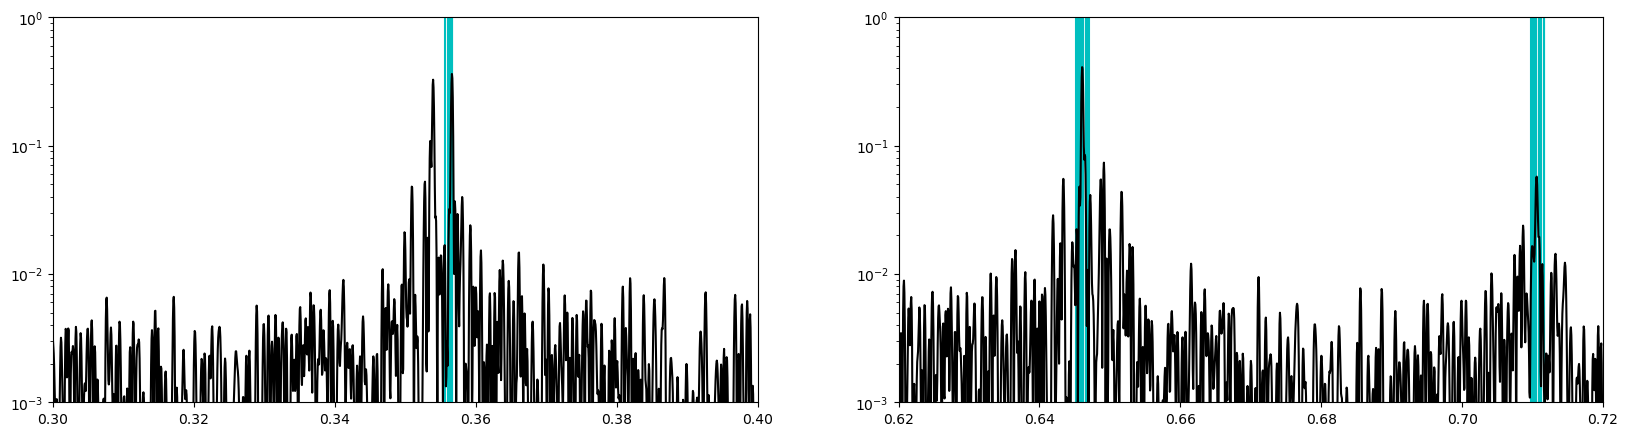

In [832]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
for pp in np.exp(pgs[:, -2]):
    plt.axvline(pp, c='c')
plt.plot(freq,pwr,c='k')
plt.yscale('log')
plt.xlim(0.3, 0.4)
plt.ylim(1e-3, 1)

plt.subplot(122)
for pp in np.exp(pgs[:, -2]):
    plt.axvline(pp, c='c')
plt.plot(freq,pwr,c='k')
plt.yscale('log')
plt.xlim(0.62, 0.72)
plt.ylim(1e-3, 1)

plt.show()

In [833]:
    nburn, nsamp = 200, 1000
_ = sampler.run_mcmc(pgs, nburn+nsamp, progress=True)

100%|███████████████████████████████████████████████| 1200/1200 [31:45<00:00,  1.59s/it]


(1200, 19, 5)


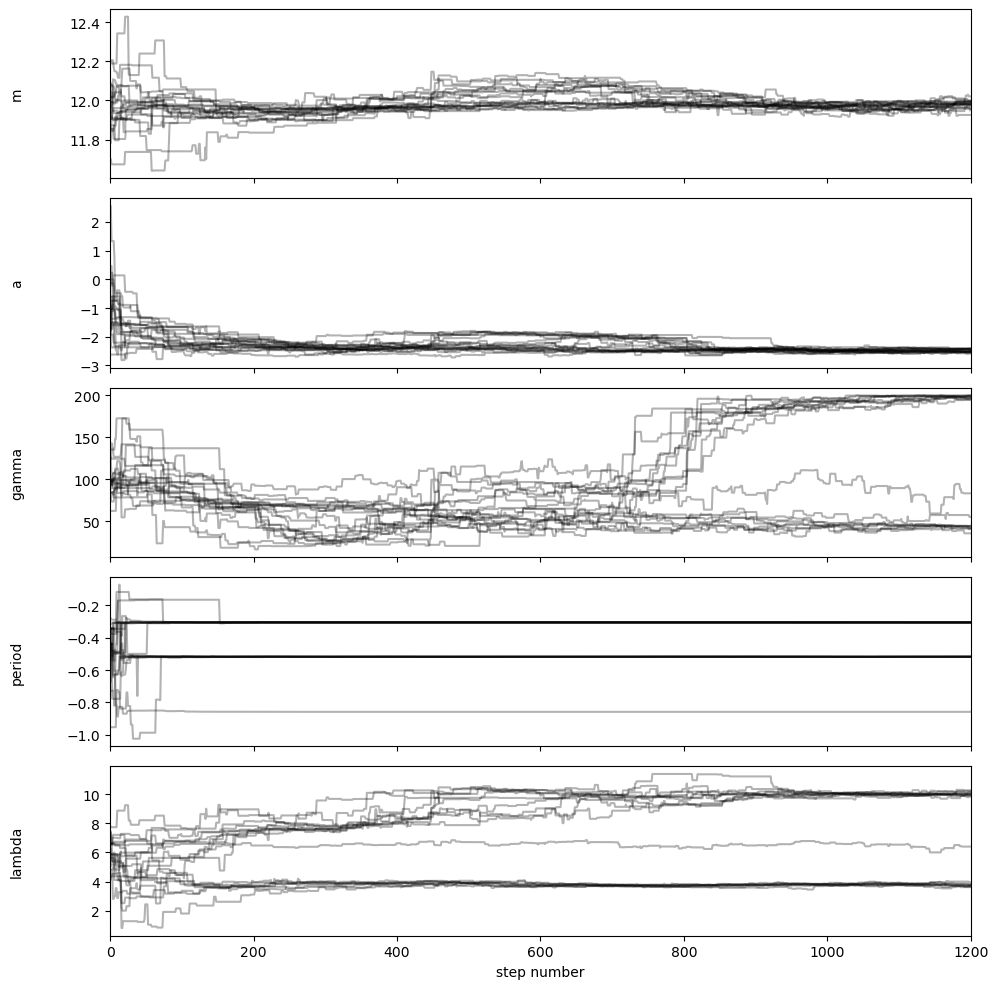

In [938]:
### plotting results
fig, axes = plt.subplots(5, figsize=(10, 10), sharex=True)
samples = sampler.get_chain()
labels = ['m', 'a', 'gamma', 'period','lambda']
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")
plt.tight_layout()
plt.show()

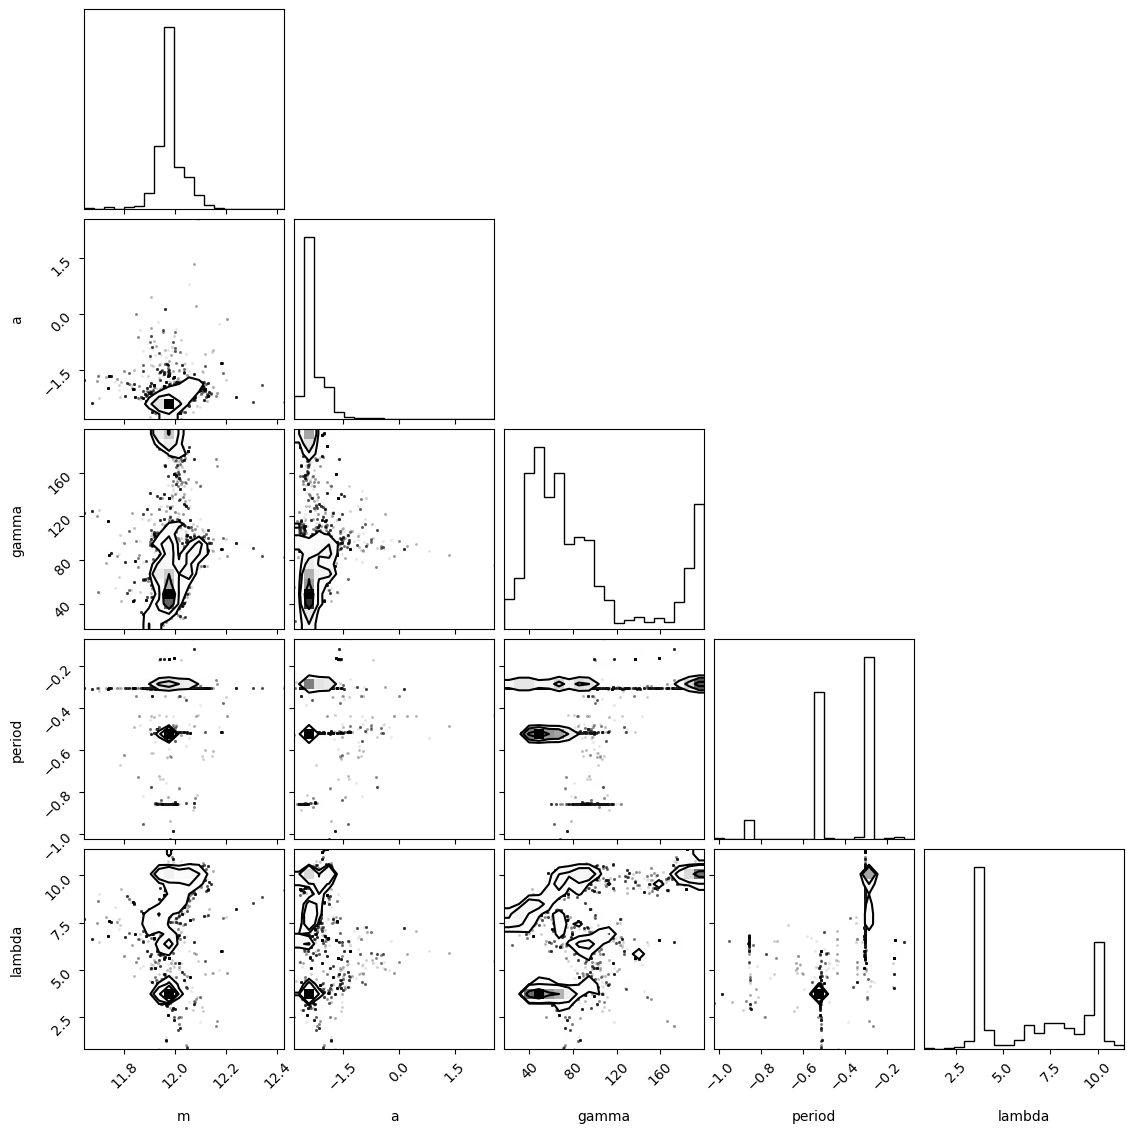

In [942]:
import corner
flat_samples = sampler.get_chain(flat=True, discard=200)
corner.corner(flat_samples,labels=labels)
plt.show()

In [944]:
ps = np.median(flat_samples, axis=0)
ps

array([11.97362538, -2.40225258, 68.77907208, -0.30580385,  6.67634248])

### 2c - Infer the model parameters (11 pts)

Plot the chains, the corner plot, the folded lightcurve, the Gaussian process model given the median parameters, 10 other draws from the model and the uncertainty about the model. 


In [945]:
uguess = ps.copy()
usigs = sigmas.copy()*1e-2

In [946]:
def lnprior(p): # p = [m, a, gamma, period, lam]
    m, a, gamma, period, lam = p
    
    lnp = np.zeros(len(p))
    for j in range(len(p)):
        lim = bounds[j]
        if (p[j] < lim[0]) or (p[j] > lim[1]):
            return -np.inf
        else:
            lnp[j] = -0.5*((p[j]-uguess[j])/(usigs[j]))**2
    return lnp.sum()

def lnprob(p): # p = [m, a, gamma, period, lam]
    gp.set_parameter_vector(p)
    return gp.log_likelihood(atota['MAG_0'], quiet=True) + lnprior(p)

In [948]:
nwalkers, ndim = 15, len(gp)
sampler2 = emcee.EnsembleSampler(nwalkers, ndim, lnprob)

upg = st.norm.rvs(loc=ps, scale=gsig, size=(nwalkers,ndim))

In [950]:
    nburn, nsamp = 200, 1000
_ = sampler2.run_mcmc(upg, nburn+nsamp, progress=True)

100%|███████████████████████████████████████████████| 1200/1200 [15:49<00:00,  1.26it/s]


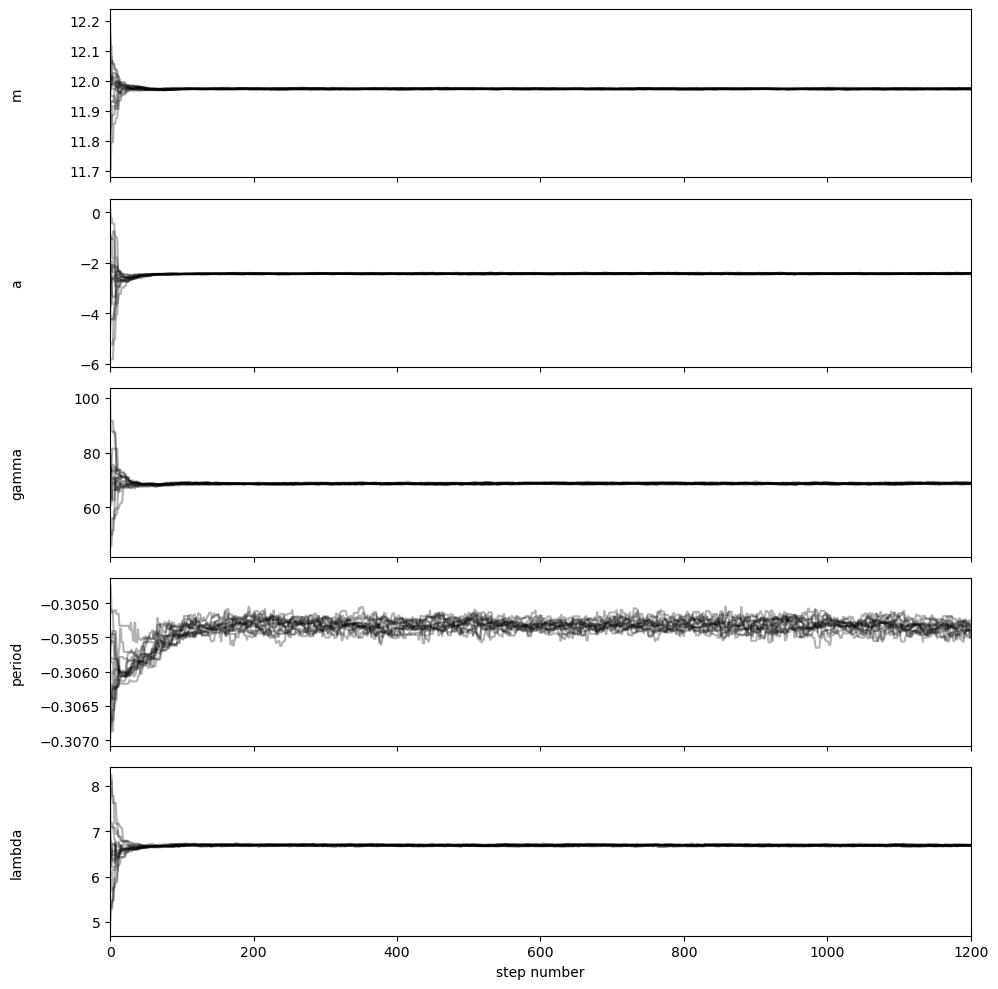

In [951]:
### plotting results
fig, axes = plt.subplots(5, figsize=(10, 10), sharex=True)
samples2 = sampler2.get_chain()
labels = ['m', 'a', 'gamma', 'period','lambda']
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples2[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples2))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")
plt.tight_layout()
plt.show()

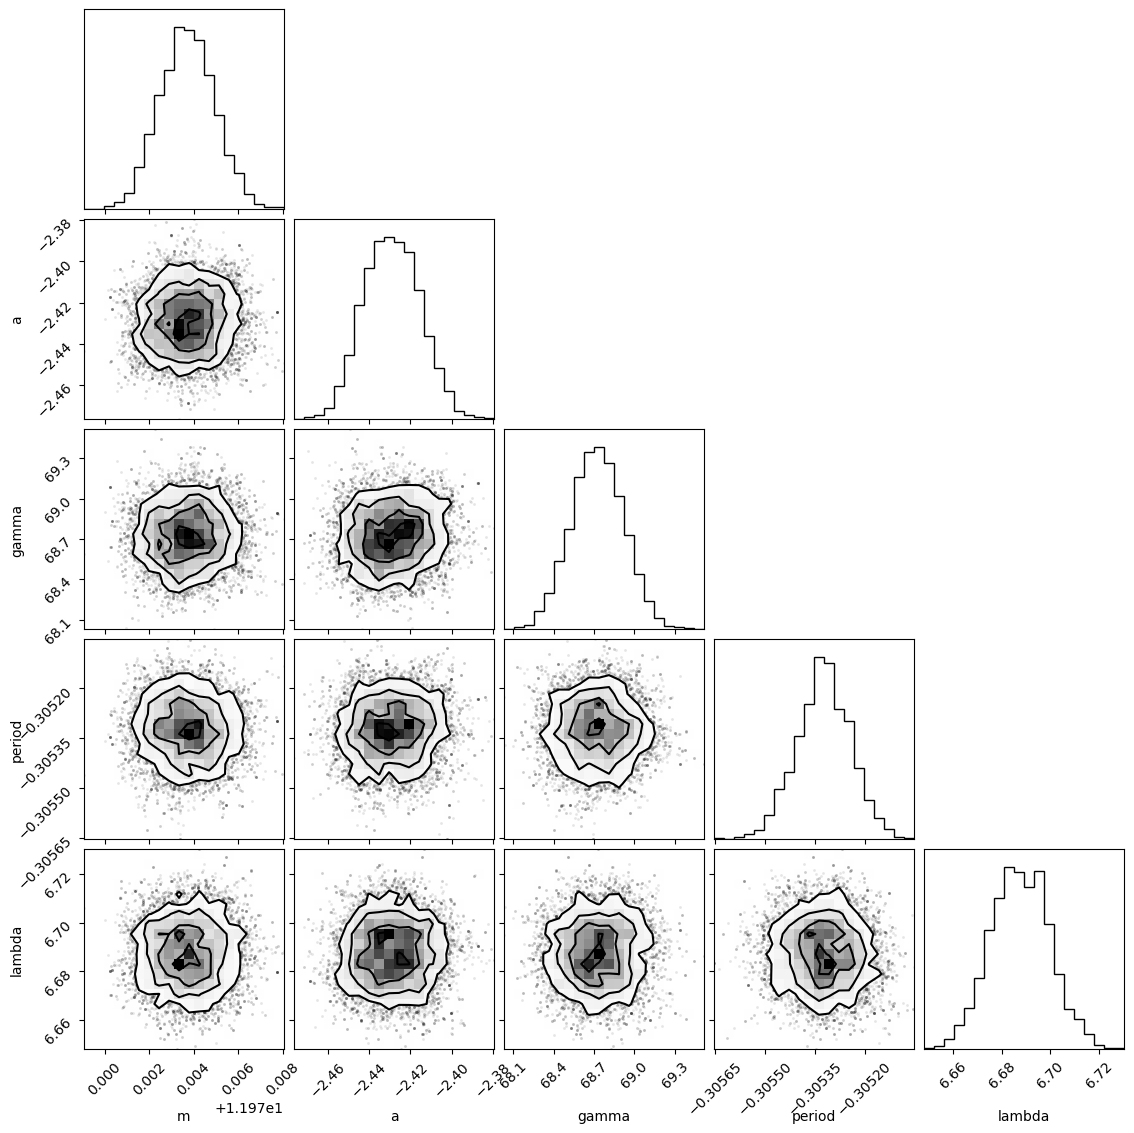

In [952]:
flat_samples2 = sampler2.get_chain(flat=True, discard=200)
corner.corner(flat_samples2,labels=labels)
plt.show()

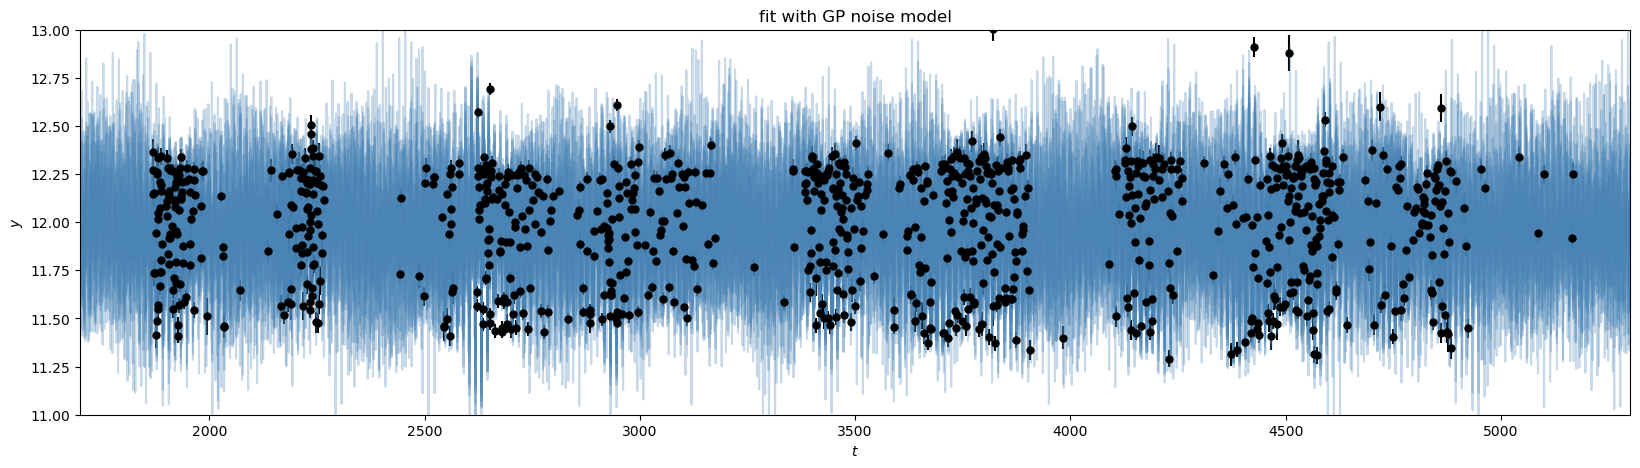

In [975]:
xx = np.linspace(1500, 5500, 4001)

plt.figure(figsize=(20, 5))
plt.errorbar(atota['HJD'],atota['MAG_0'],yerr=atota['MER_0'],fmt='o',markersize=5,color='k')
for s in flat_samples2[np.random.randint(len(flat_samples2), size=10)]:
    gp.set_parameter_vector(s)
    mu = gp.sample_conditional(atota['MAG_0'], xx)
    plt.plot(x, mu, color="#4682b4", alpha=0.3)
plt.ylabel(r"$y$")
plt.xlabel(r"$t$")
plt.title("fit with GP noise model");
plt.xlim(1700, 5300)
plt.ylim(11, 13)
plt.show()

In [976]:
fps = np.median(flat_samples2, axis=0)

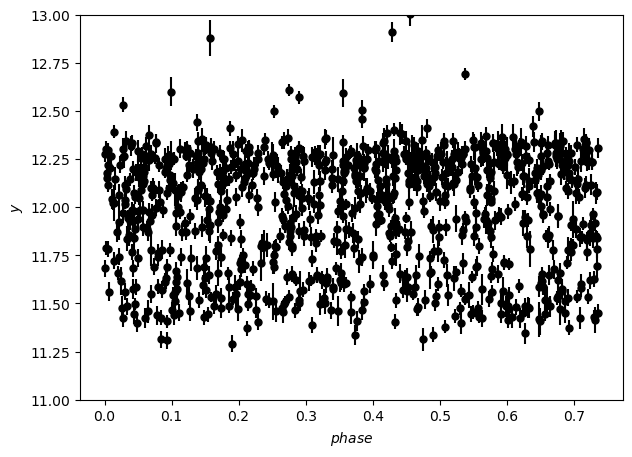

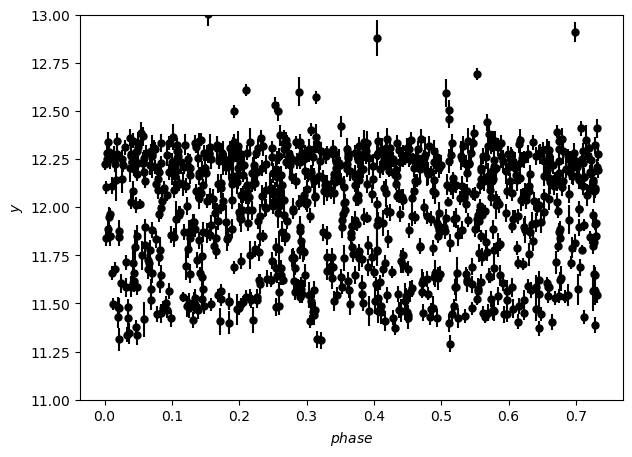

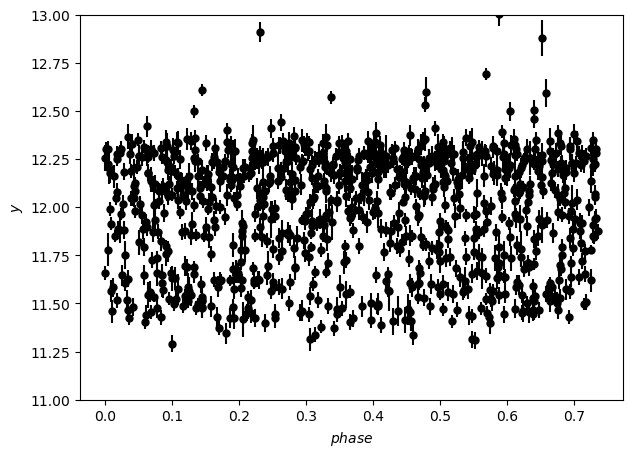

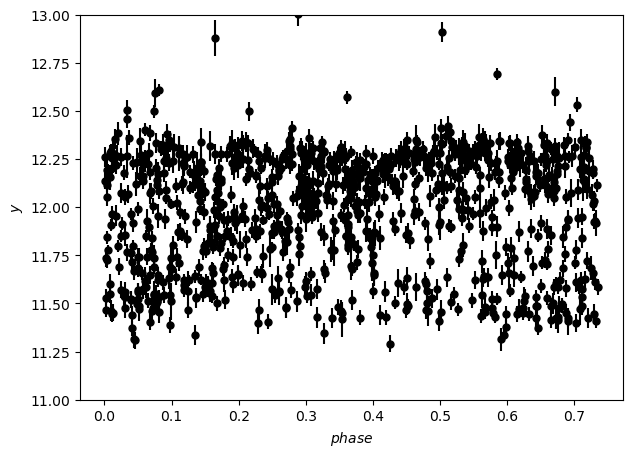

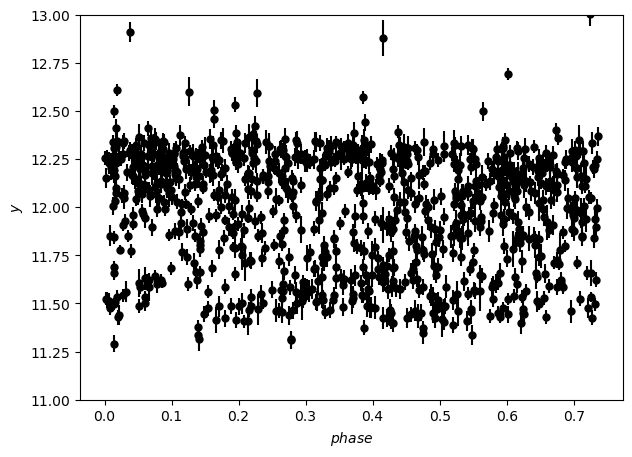

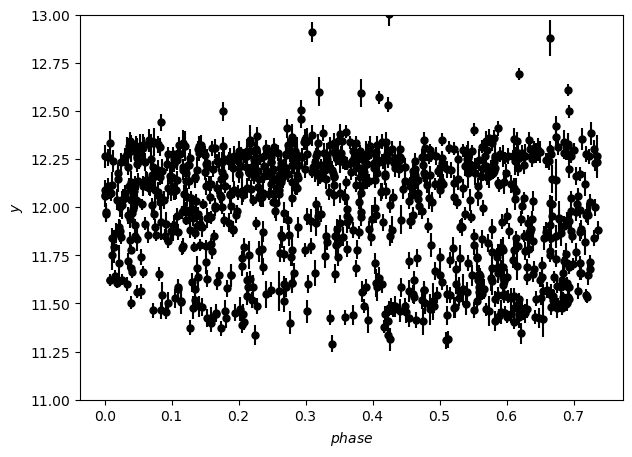

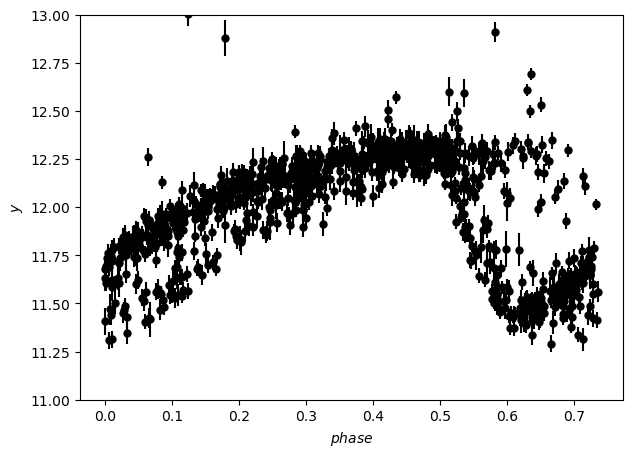

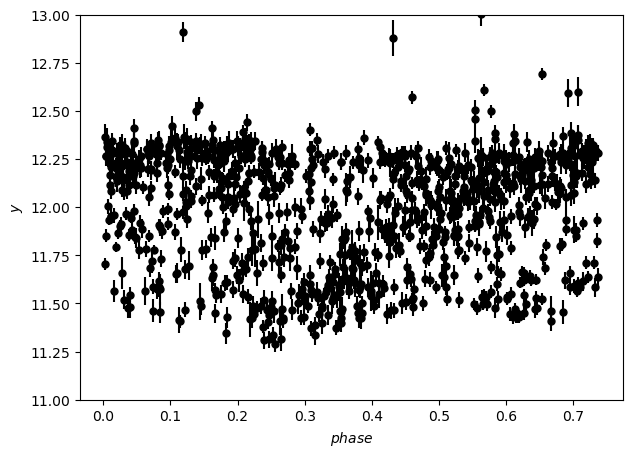

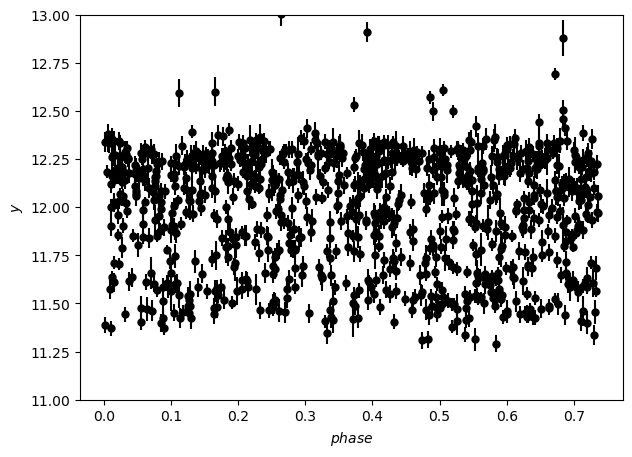

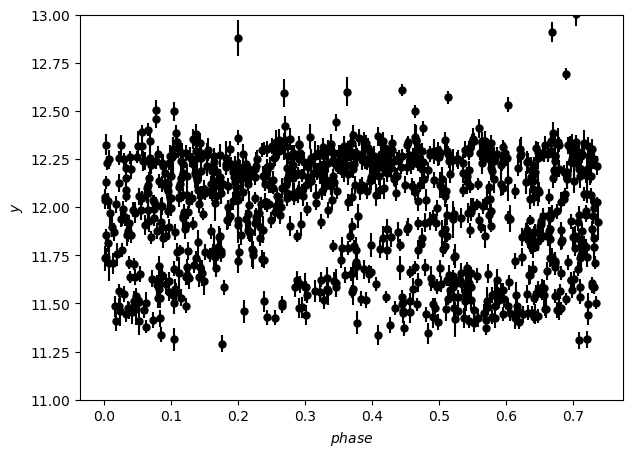

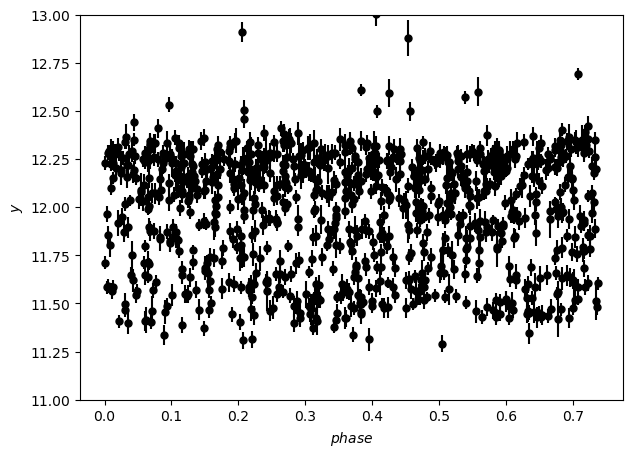

In [977]:
for dp in np.linspace(-1e-3, 1e-3, 11):
    plt.figure(figsize=(7, 5))
    plt.errorbar(atota['HJD']%(np.exp(fps[-2])+dp),atota['MAG_0'],yerr=atota['MER_0'],fmt='o',markersize=5,color='k')
    plt.ylabel(r"$y$")
    plt.xlabel(r"$phase$")
    #plt.xlim(1700, 5300)
    plt.ylim(11, 13)
    plt.show()

N.B. you should be a bit worried about "burn in" and how the walkers were initialized throughout. If you plan to use GPs to search for periods in your own work, I highly recommend you read Angus et al. 2018 on the GP periodogram. Angus et al. provide far more intelligent methods for initializing the MCMC than what is presented here. 

### Q3: PyMC (yes, that thing), hierarchical mixture models, and the mass-radius relation for small exoplanets

The mass-radius relation is a relationship between the radius $R$ of an exoplanet and its mass $M$. We usually call planets smaller than the Neptune size $(R < 4 R_{\oplus})$ small planets. In the Solar System, we don't have any planets between the Earth and Neptune sizes ($ 1-4 R_{\oplus}$), whereas in extrasolar systems, plenty of planets with radii in the range are observed. Thus, it's extremely intriguing to study the compositions of these planets and understand why we don't have one in the Solar System.

In this problem, you will work on one of the papers that one of our colloquium speakers brought up (this is why you should go to colloquium btw, because it'd have totally helped with this final exam to know the answer) - the mass-radius relation for small exoplanets around M-dwarfs. 

The paper is by [Luque et al., Science 377, 1211 (2022)](https://ui.adsabs.harvard.edu/abs/2022arXiv220903871L/abstract). We will reproduce some of their results using the PyMC.

In [774]:
import pymc3 as pm

In [4]:
## Download the dataset from Luque et al. 2022
data = pd.read_csv("https://carmenes.caha.es/ext/tmp/TMP.csv")
data.head()

ID  ID_Star      Star          AltName       Karmn     RA_J2000  \
0   1        1   GJ 3053         LHS 1140  J00449-152  00:44:59.33   
1   2        1   GJ 3053         LHS 1140  J00449-152  00:44:59.33   
2   3        2  TOI-1468  LSPM J0106+1913  J01066+192  01:06:36.98   
3   4        2  TOI-1468  LSPM J0106+1913  J01066+192  01:06:36.98   
4   5        3   GJ 3090          TOI-177         NaN  01:21:45.39   

      DE_J2000     SpT  SpTnum    d_pc  ...  eurho_gcm-3  edrho_gcm-3  Teq_K  \
0  -15:16:17.5  M4.5 V     4.5  14.964  ...         0.84         0.80  378.9   
1  -15:16:17.5  M4.5 V     4.5  14.964  ...         0.81         0.74  708.9   
2  +19:13:33.2    M3 V     3.0  24.721  ...         1.05         0.92  682.2   
3  +19:13:33.2    M3 V     3.0  24.721  ...         0.21         0.19  337.5   
4  -46:42:51.8    M2 V     2.0  22.454  ...         0.52         0.45  693.0   

   euTeq_K  edTeq_K     TSM   ESM  Method  DiscoveryRef       ParameterRef  
0      4.3      4.2    8.88  0.19      RV         Dit17  Dit17 Men19 Lil20  
1      8.0      7.8   25.90  3.45      RV         Dit17  Dit17 Men19 Lil20  
2      7.4      6.9    9.00  6.30      RV         Cha22              Cha22  
3      3.7      3.4   59.00   NaN      RV         Cha22              Cha22  
4     18.0     18.0  221.00   NaN      RV        Alm22a             Alm22a  

[5 rows x 44 columns]

In [704]:
## Lets extract mass and radius and their uncertainties from the data; both M and R are in Earth units 
M = data.M_Mterra
R = data.R_Rterra

err_M = (data.edM_Mterra+data.euM_Mterra)/2  # Assume the + and - errors on M and R are symmetric because lazy
err_R = (data.edR_Rterra+data.euR_Rterra)/2

ind = err_R < 1.
M = M[ind]
R = R[ind]
err_M = err_M[ind]
err_R = err_R[ind]

c=data['rho_gcm-3'][ind]
err_c=(data['edrho_gcm-3']+data['eurho_gcm-3'])[ind]/2

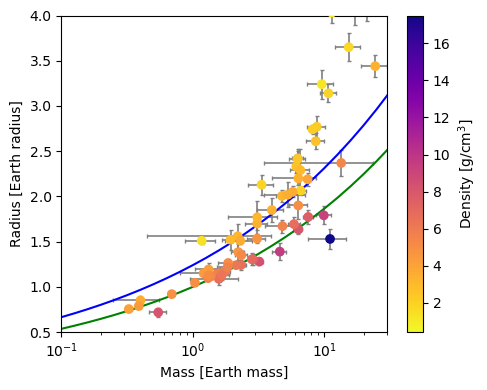

In [736]:
## Plot the mass and radius of small planets around M-dwarfs
rr = lambda a, b, mm: a*mm**b
mt = 10**np.linspace(-2, 3, 51)

# Zheng et al. 2019
rc = rr(1, 1/3.7, mt)
rw = rr(1+0.55*0.5-0.14*0.5**2, 1/3.7, mt)

plt.figure(figsize=(5,4))
plt.errorbar(M, R, xerr=err_M, yerr=err_R,
             linestyle='', fmt='o', markersize=4, elinewidth=1.2, capsize=1.2, c='grey')
plt.scatter(M, R, c=c, zorder=100, cmap='plasma_r')
plt.plot(mm, rc, c='g')
plt.plot(mm, rw, c='b')
plt.xlim(0.1, 30)
plt.ylim(0.5, 4)
plt.xscale('log')
plt.xlabel('Mass [Earth mass]')
plt.ylabel('Radius [Earth radius]')
plt.colorbar(label=r'Density [g/cm$^3$]')
plt.tight_layout()
plt.show()

In [766]:
rcd = rr(1, 1/3.7, M)
rwd = rr(1+0.55*0.5-0.14*0.5**2, 1/3.7, M)

tol = np.std(c)/5.51*0.5
ind_rock = (c/5.51>(M/rcd**3.7-tol))&(c/5.51<(M/rcd**3.7+tol))&(err_c<10*tol)
ind_water = (c/5.51>(M/rwd**3.7-0.5*tol))&(c/5.51<(M/rwd**3.7+0.5*tol))&(err_c<10*tol)&(M>2)

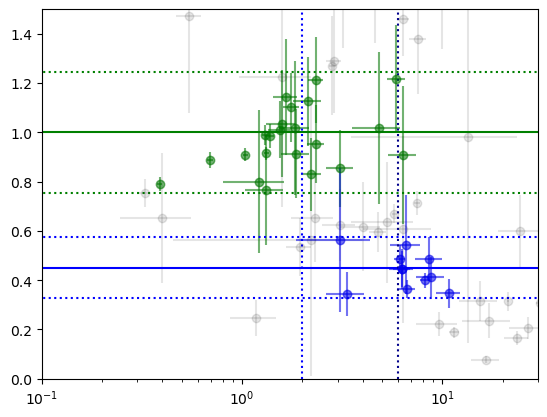

In [771]:
plt.errorbar(M, c/5.51, xerr=err_M, yerr=err_c/5.51, fmt='o', c='k', alpha=0.1)
plt.errorbar(M[ind_rock], c[ind_rock]/5.51, xerr=err_M[ind_rock], yerr=err_c[ind_rock]/5.51, fmt='o', c='green', alpha=0.5)
plt.errorbar(M[ind_water], c[ind_water]/5.51, xerr=err_M[ind_water], yerr=err_c[ind_water]/5.51, fmt='o', c='blue', alpha=0.5)
plt.plot(mt, mt/rc**3.7, c='g')
plt.plot(mt, mt/rc**3.7+tol, c='g', ls=':')
plt.plot(mt, mt/rc**3.7-tol, c='g', ls=':')

plt.plot(mt, mt/rw**3.7, c='b')
plt.plot(mt, mt/rw**3.7+0.5*tol, c='b', ls=':')
plt.plot(mt, mt/rw**3.7-0.5*tol, c='b', ls=':')
plt.axvline(2, c='blue', ls=':')
plt.axvline(6, c='darkblue', ls=':')
plt.xscale('log')
plt.xlim(0.1, 30)
plt.ylim(0, 1.5)
plt.show()

Exoplaneteers made up cute names to describe planets in different compositions.
- "Rocky world" if a planet has a bulk density similar to the Earth.
- "Water world" if a planet has a bulk density consistent with 50% rocky and 50% water ice.
- "Puffy world" if a planet has a bulk density smaller than the "Water World" density.

Now, while it's possible that this final is making you wish you were on a "puff" of something or the other, we'll restrict our analysis to the rocky and water worlds. It's where the grant dollars are. 


### 3a - modeling the mass radius relation for rocky worlds (11 pts) 

First, select the rocky worlds. 

Let's write down the mass-radius relation for rocky worlds as a power law.

$R = aM^b$, where $a$ is proportional to $1/\rho_{\oplus}$, and $b$ is unitless. If the relation follows $M = \frac{4}{3}\pi R^3 \rho$, we have $a = 1$ and $b = 1/3$. However, in reality, the interior density of planets is not uniform and depends on the equation of state.

Build a PyMC model to find parameters of interest {a, b}. Plot the traces (`pm` has a `plot_trace` function)and inferred model, along with some draws.

Hints:
- As a, b have to be positive, I'd suggest Uniform priors on log a, log b, and then using pm.Deterministic to exponentiate them 
- For the masses, since you've selected the rocky worlds, I'd suggest a normal distribution with the sample mean and sample standard deviation of the rocky worlds. 
- Given M, a, b you can use pm.Deterministic to get R_model
- Assume our favorite normal likelihood for R_model. You have the observed radius and their uncertainties from the file.

In [801]:
import arviz as az

In [978]:
#pymc model

basic_model = pm.Model()

with basic_model:

    #uniform priors for loga and logb
    loga = pm.Uniform('loga',lower=-2,upper=1)
    logb = pm.Uniform('logb',lower=-2,upper=1)
    #a = pm.Normal('a', mu=1, sigma=5)
    #b = pm.Normal('b', mu=1/3, sigma=5)

    # exponentiate
    a = pm.Deterministic("a", pm.math.exp(loga))
    b = pm.Deterministic("b", pm.math.exp(logb))
    
    #m = pm.Normal('m', mu=np.mean(M.values),sigma=np.std(M.values))
    #logm = pm.Normal('logm', mu=np.log(np.mean(M.values)), sigma=np.std(M.values)/M.values)
    #m = pm.Deterministic('m', pm.math.exp(logm))
    
    # model
    #rmod = pm.Deterministic('rmod', a * m**b)
    rmod = a * M.values[ind_rock]**b
    #rmod = a * m**b
    
    # normal likelihood for model
    likelihood = pm.Normal('likelihood', mu=rmod, sigma=err_R.values[ind_rock], observed=R.values[ind_rock])

    # and then to sample!
    samples_ols = pm.sample(5000, cores=4) # draw 5000 posterior samples 

/Users/seonwoo/anaconda3/envs/sw/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [logb, loga]
INFO:pymc3:NUTS: [logb, loga]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 20 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 20 seconds.


/Users/seonwoo/anaconda3/envs/sw/lib/python3.10/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'loga'}>,
        <AxesSubplot:title={'center':'loga'}>],
       [<AxesSubplot:title={'center':'logb'}>,
        <AxesSubplot:title={'center':'logb'}>],
       [<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'a'}>],
       [<AxesSubplot:title={'center':'b'}>,
        <AxesSubplot:title={'center':'b'}>]], dtype=object)

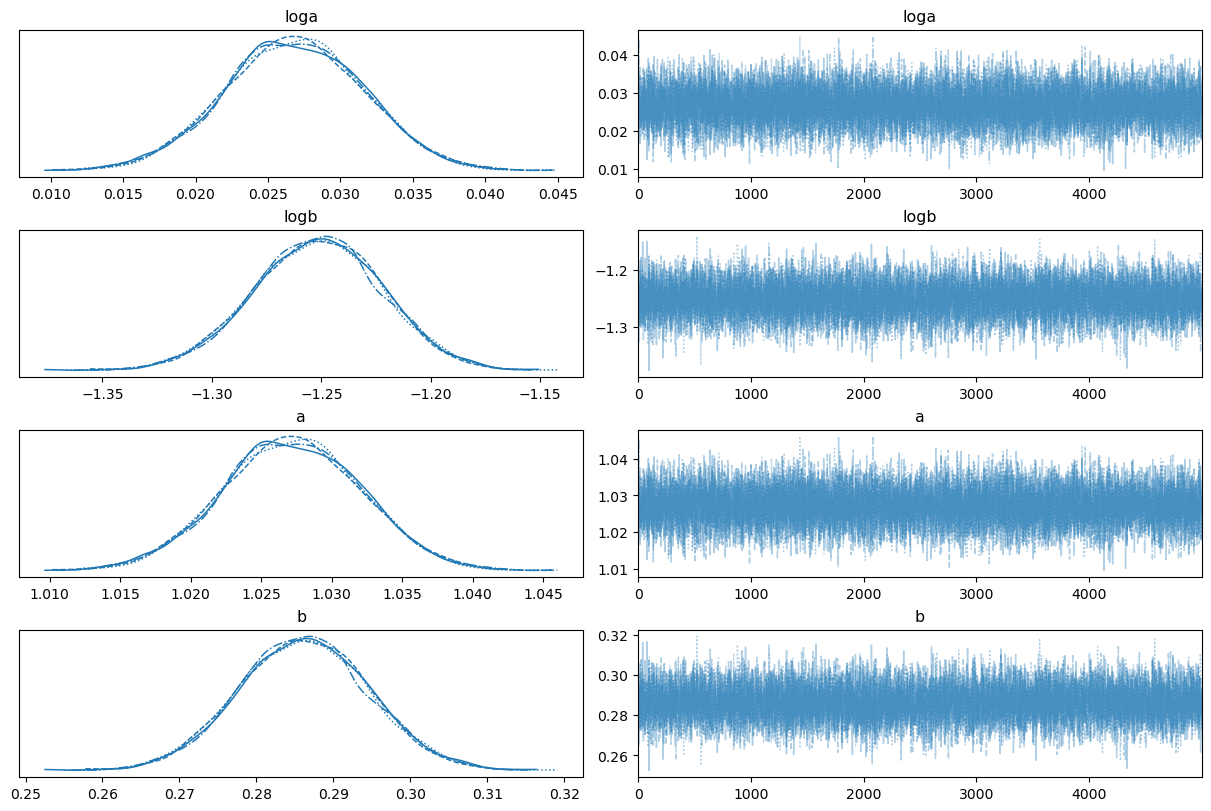

In [979]:
# plot trace
pm.plot_trace(samples_ols)

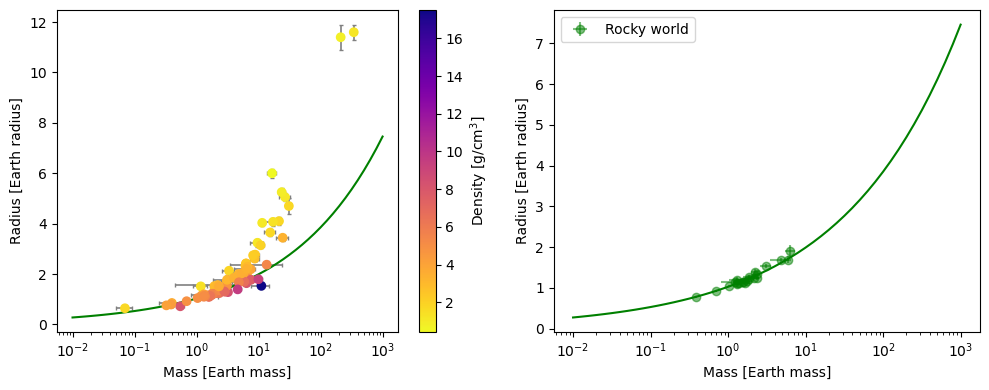

In [980]:
## Plot the mass and radius of small planets around M-dwarfs
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.errorbar(M, R, xerr=err_M, yerr=err_R,
             linestyle='', fmt='o', markersize=4, elinewidth=1.2, capsize=1.2, c='grey')
plt.scatter(M, R, c=c, zorder=100, cmap='plasma_r')
plt.plot(mt, rr(1.027, 0.287), c='g')
plt.xscale('log')
plt.xlabel('Mass [Earth mass]')
plt.ylabel('Radius [Earth radius]')
plt.colorbar(label=r'Density [g/cm$^3$]')

plt.subplot(122)
plt.errorbar(M[ind_rock], R[ind_rock], xerr=err_M[ind_rock], yerr=err_R[ind_rock],
             fmt='o', c='g', alpha=0.5, label='Rocky world')
plt.plot(mt, rr(1.027, 0.287), c='g')
plt.xscale('log')
plt.xlabel('Mass [Earth mass]')
plt.ylabel('Radius [Earth radius]')
plt.legend()
plt.tight_layout()
plt.show()

### 3b - The Mass-Radius Relation for Rocky+Water Worlds (23 pts) 

Let's now add water worlds and model the mass-radius relation for both rocky and water worlds. Physically, it will require two models to describe the mass-radius relations for rocky and water worlds. The tricky part is we don't know exactly which kind of worlds a planet is belong to. In this situation, it is helpful to introduce a categorical variable `z` that is either 0 or 1, with the relative posterior probabilities telling us how Rocky/Watery a planet is.

Select the Rocky Water worlds - see the categories above 3a again. 

To make this work like magic with PyMC and it's Monte-Carlo sampler, we can choose a special prior for our categorial variable: the Drichlet Prior - https://en.wikipedia.org/wiki/Dirichlet_distribution

    # Two categories for water and rocky worlds
    p = pm.Dirichlet("p", a=np.ones(2), shape=2)
    z = pm.Categorical("z", p=p, shape=len(RockyWaterWorlds))
    

The rest of the PyMC model should be the same as 3a except you are fitting two relations - one for rocky worlds and one for water worlds, so you need two different `a` and `b` parameters - `shape=2` as above should take it. You might want to sort the `a` parameter with `transform=pm.distributions.transforms.ordered` when you define the prior to sort things. 

Build a PyMC model to find parameters of interest {a, b}. Plot the traces (`pm` has a `plot_trace` function)and inferred model, along with some draws.

In [799]:
#pymc model

basic_model2 = pm.Model()

with basic_model2:
    
    #uniform priors
    p = pm.Dirichlet("p", a=np.ones(2), shape=2)
    z = pm.Categorical("z", p=p, shape=len(M.values[ind_rock+ind_water]))
    
    loga1 = pm.Uniform('loga1',lower=-2,upper=1,transform=pm.distributions.transforms.ordered,shape=2,testval=[-0.1, 0.1])
    logb1 = pm.Uniform('logb1',lower=-2,upper=1,transform=pm.distributions.transforms.ordered,shape=2,testval=[np.log(0.3), np.log(0.4)])
    #loga2 = pm.Uniform('loga2',lower=-1,upper=1)
    #logb2 = pm.Uniform('logb2',lower=-1,upper=1)

    # exponentiate
    a1 = pm.Deterministic("a1", pm.math.exp(loga1))
    b1 = pm.Deterministic("b1", pm.math.exp(logb1))
    #a2 = pm.Deterministic("a2", pm.math.exp(loga2))
    #b2 = pm.Deterministic("b2", pm.math.exp(logb2))
    
    m1 = pm.Deterministic("m1", z*M.values[ind_rock+ind_water])
    m2 = pm.Deterministic("m2", (1-z)*M.values[ind_rock+ind_water])

    #
    # model
    #rmod1 = a1 * M.values**b1
    #rmod2 = a2 * M.values**b2
    rmod = a1[0] * m1**b1[0] + a1[1] * m2**b1[1]
    
    # normal likelihood for model
    likelihood = pm.Normal('likelihood', mu=rmod, sigma=err_R.values[ind_rock+ind_water], observed=R.values[ind_rock+ind_water])
    #likelihood2 = pm.Normal('likelihood2', mu=rmod2, sigma=err_R.values, observed=R.values)

    # and then to sample!
    samples_ols2 = pm.sample(5000, cores=4) # draw 5000 posterior samples 

/Users/seonwoo/anaconda3/envs/sw/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
INFO:pymc3:CompoundStep
>NUTS: [logb1, loga1, p]
INFO:pymc3:>NUTS: [logb1, loga1, p]
>BinaryGibbsMetropolis: [z]
INFO:pymc3:>BinaryGibbsMetropolis: [z]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 78 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 78 seconds.
/Users/seonwoo/anaconda3/envs/sw/lib/python3.10/site-packages/arviz/stats/diagnostics.py:561: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
The acceptance probability does not match the target. It is 0.9507908750816723, but should be close to 0.8. Try to increase the number of tuning steps.
There were 71 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 71 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9373454830423292, but should be close to 0.8. Try to increase the number of tuning steps.
There were 389 divergences after tuning. Increase `targe

/Users/seonwoo/anaconda3/envs/sw/lib/python3.10/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Users/seonwoo/anaconda3/envs/sw/lib/python3.10/site-packages/arviz/stats/density_utils.py:783: RuntimeWarning: divide by zero encountered in true_divide
  pdf /= bw * (2 * np.pi) ** 0.5
/Users/seonwoo/anaconda3/envs/sw/lib/python3.10/site-packages/arviz/stats/density_utils.py:783: RuntimeWarning: invalid value encountered in true_divide
  pdf /= bw * (2 * np.pi) ** 0.5
/Users/seonwoo/anaconda3/envs/sw/lib/python3.10/site-packages/arviz/stats/density_utils.py:620: RuntimeWarning: invalid value encountered in double_scalars
  x_std = (((x ** 2).sum() / x_len) - (x.sum() / x_len) ** 2) ** 0.5
/Users/seonwoo/anaconda3/envs/sw/lib/python3.10/site-

array([[<AxesSubplot:title={'center':'z'}>,
        <AxesSubplot:title={'center':'z'}>],
       [<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>],
       [<AxesSubplot:title={'center':'loga1'}>,
        <AxesSubplot:title={'center':'loga1'}>],
       [<AxesSubplot:title={'center':'logb1'}>,
        <AxesSubplot:title={'center':'logb1'}>],
       [<AxesSubplot:title={'center':'a1'}>,
        <AxesSubplot:title={'center':'a1'}>],
       [<AxesSubplot:title={'center':'b1'}>,
        <AxesSubplot:title={'center':'b1'}>],
       [<AxesSubplot:title={'center':'m1'}>,
        <AxesSubplot:title={'center':'m1'}>],
       [<AxesSubplot:title={'center':'m2'}>,
        <AxesSubplot:title={'center':'m2'}>]], dtype=object)

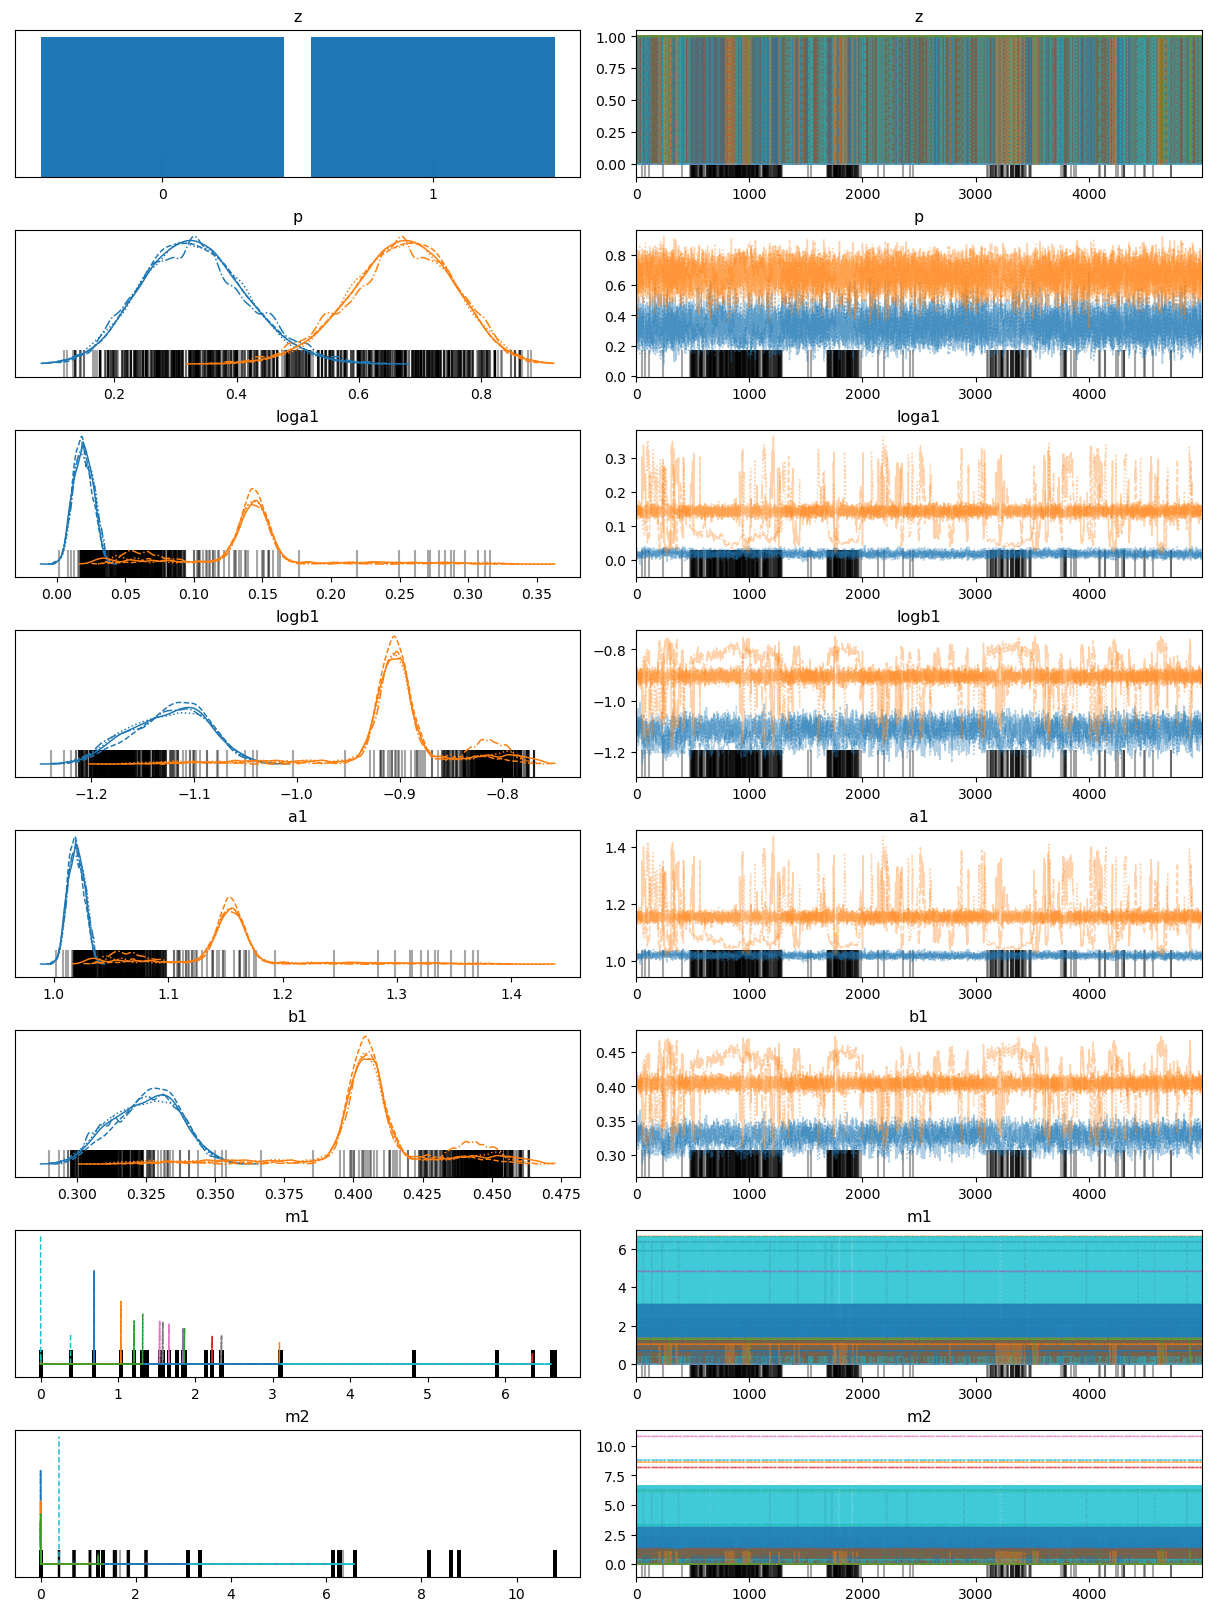

In [800]:
pm.plot_trace(samples_ols)

In [803]:
ppc = pm.sample_posterior_predictive(samples_ols, model=basic_model)

In [814]:
ppc = az.from_pymc3(posterior_predictive=pm.sample_posterior_predictive(samples_ols, model=basic_model),
                    observed_data=R.values[ind_rock+ind_water])

/Users/seonwoo/anaconda3/envs/sw/lib/python3.10/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [ ]:
az.

In [815]:
az.plot_ppc(ppc, num_pp_samples=10)

TypeError: `data` argument must have the group "observed_data" for ppcplot

In [782]:
aa = [1.02, 1.16]
bb = [0.325, 0.41]

In [783]:
mm = 10**np.linspace(-2, 3, 51)
rr = lambda a, b: a*mm**b

rr0 = rr(aa[0], bb[0])
rr1 = rr(aa[1], bb[1])

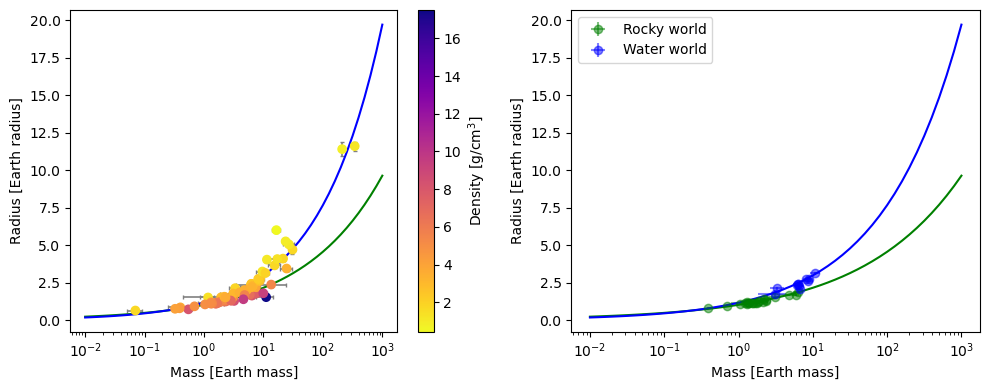

In [796]:
## Plot the mass and radius of small planets around M-dwarfs
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.errorbar(M, R, xerr=err_M, yerr=err_R,
             linestyle='', fmt='o', markersize=4, elinewidth=1.2, capsize=1.2, c='grey')
plt.scatter(M, R, c=c, zorder=100, cmap='plasma_r')
plt.plot(mt, rr(aa[0], bb[0]), c='g')
plt.plot(mt, rr(aa[1], bb[1]), c='b')
plt.xscale('log')
plt.xlabel('Mass [Earth mass]')
plt.ylabel('Radius [Earth radius]')
plt.colorbar(label=r'Density [g/cm$^3$]')

plt.subplot(122)
plt.errorbar(M[ind_rock], R[ind_rock], xerr=err_M[ind_rock], yerr=err_R[ind_rock],
             fmt='o', c='g', alpha=0.5, label='Rocky world')
plt.errorbar(M[ind_water], R[ind_water], xerr=err_M[ind_water], yerr=err_R[ind_water],
             fmt='o', c='b', alpha=0.5, label='Water world')
plt.plot(mt, rr(aa[0], bb[0]), c='g')
plt.plot(mt, rr(aa[1], bb[1]), c='b')
plt.xscale('log')
plt.xlabel('Mass [Earth mass]')
plt.ylabel('Radius [Earth radius]')
plt.legend()
plt.tight_layout()
plt.show()

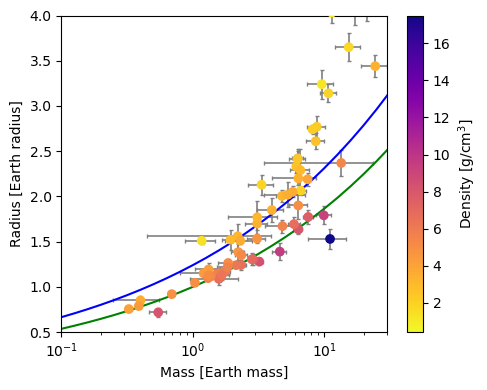

In [736]:
## Plot the mass and radius of small planets around M-dwarfs
rr = lambda a, b, mm: a*mm**b
mt = 10**np.linspace(-2, 3, 51)
rc = rr(1, 1/3.7, mt)
rw = rr(1+0.55*0.5-0.14*0.5**2, 1/3.7, mt)

plt.figure(figsize=(5,4))
plt.errorbar(M, R, xerr=err_M, yerr=err_R,
             linestyle='', fmt='o', markersize=4, elinewidth=1.2, capsize=1.2, c='grey')
plt.scatter(M, R, c=c, zorder=100, cmap='plasma_r')
plt.plot(mm, rc, c='g')
plt.plot(mm, rw, c='b')
plt.xlim(0.1, 30)
plt.ylim(0.5, 4)
plt.xscale('log')
plt.xlabel('Mass [Earth mass]')
plt.ylabel('Radius [Earth radius]')
plt.colorbar(label=r'Density [g/cm$^3$]')
plt.tight_layout()
plt.show()

### Throughout, make sure your plots have things like appropriate axes scales, axes labels, errorsbars, legends, reasonable colors. Remember, these are how you tell the story of what you've done, and ultimately what we're looking at.  


### Get started. You know how to do all of this. If not, there's something in a class notebook that can help. I'm on Teams, so direct questions there. 

# Best of luck. You've got this. 